In [4]:
import pandas as pd
from glob import glob
from IPython.display import display
pd.set_option('display.max_columns', 99)
pd.set_option('display.max_rows', 200)
from matplotlib import pyplot as plt
import EDA
import utils

In [2]:
train = utils.load_train()
train.head()

100%|██████████| 20/20 [00:05<00:00,  3.63it/s]


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,...,CNT_CHILDREN-d-CNT_FAM_MEMBERS,income_per_adult,AMT_INCOME_TOTAL-d-CNT_CHILDREN,AMT_CREDIT-d-CNT_CHILDREN,AMT_ANNUITY-d-CNT_CHILDREN,AMT_GOODS_PRICE-d-CNT_CHILDREN,AMT_INCOME_TOTAL-d-cnt_adults,AMT_CREDIT-d-cnt_adults,AMT_ANNUITY-d-cnt_adults,AMT_GOODS_PRICE-d-cnt_adults,AMT_INCOME_TOTAL-d-CNT_FAM_MEMBERS,AMT_CREDIT-d-CNT_FAM_MEMBERS,AMT_ANNUITY-d-CNT_FAM_MEMBERS,AMT_GOODS_PRICE-d-CNT_FAM_MEMBERS,EXT_SOURCES_prod,EXT_SOURCES_sum,EXT_SOURCES_mean,EXT_SOURCES_std,EXT_SOURCES_1-2-3,EXT_SOURCES_2-1-3,EXT_SOURCES_1-2,EXT_SOURCES_2-3,EXT_SOURCES_1-3,DAYS_EMPLOYED_PERC,INCOME_PER_PERSON,PAYMENT_RATE,alldocs_kurt,alldocs_skew,alldocs_mean,alldocs_sum,alldocs_std,NEW_LIVE_IND_SUM,NEW_INC_PER_CHLD,NEW_INC_BY_ORG,NEW_ANNUITY_TO_INCOME_RATIO,NEW_CAR_TO_BIRTH_RATIO,NEW_CAR_TO_EMPLOY_RATIO,NEW_PHONE_TO_BIRTH_RATIO,NEW_PHONE_TO_EMPLOYED_RATIO,building_score_avg_mean,building_score_avg_std,building_score_avg_sum,building_score_mode_mean,building_score_mode_std,building_score_mode_sum,building_score_medi_mean,building_score_medi_std,building_score_medi_sum,maxwell_feature_1
0,100002,1,Cash loans,1,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,...,0.0,202500.0,2.025000e+11,4.065975e+11,2.470050e+10,3.510000e+11,202500.0,406597.50,24700.50,351000.0,202500.0,406597.50,24700.50,351000.0,0.003043,0.485361,0.161787,0.092026,-0.319287,0.040536,-0.179912,0.123573,-0.056339,0.067329,202500.0,0.060749,20.0,4.472136,0.05,1,0.223607,5,202500.0,157500.0,0.121977,NaN,NaN,0.119860,1.780220,0.144336,0.286699,2.0207,0.128494,0.272671,2.0559,0.144814,0.287301,2.0274,0.107579
1,100003,0,Cash loans,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188.0,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,...,0.0,135000.0,2.700000e+11,1.293502e+12,3.569850e+10,1.129500e+12,135000.0,646751.25,17849.25,564750.0,135000.0,646751.25,17849.25,564750.0,NaN,0.933513,0.466757,0.219895,NaN,NaN,-0.310978,NaN,NaN,0.070862,135000.0,0.027598,20.0,4.472136,0.05,1,0.223607,4,270000.0,135000.0,0.132216,NaN,NaN,0.049389,0.696970,0.206343,0.308426,2.8888,0.183981,0.295250,2.9437,0.206814,0.308690,2.8954,NaN
2,100004,0,Revolving loans,1,1,1,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225.0,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,...,0.0,67500.0,6.750000e+10,1.350000e+11,6.750000e+09,1.350000e+11,67500.0,135000.00,6750.00,135000.0,67500.0,135000.00,6750.00,135000.0,NaN,1.285479,0.642739,0.122792,NaN,NaN,NaN,-0.173655,NaN,0.011814,67500.0,0.050000,0.0,0.000000,0.00,0,0.000000,7,67500.0,135000.0,0.099999,-0.001365,-0.115556,0.042791,3.622222,NaN,NaN,0.0000,

In [3]:
test  = utils.load_test()
test.head()

100%|██████████| 20/20 [00:01<00:00, 14.32it/s]


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,CNT_CHILDREN-d-CNT_FAM_MEMBERS,income_per_adult,AMT_INCOME_TOTAL-d-CNT_CHILDREN,AMT_CREDIT-d-CNT_CHILDREN,AMT_ANNUITY-d-CNT_CHILDREN,AMT_GOODS_PRICE-d-CNT_CHILDREN,AMT_INCOME_TOTAL-d-cnt_adults,AMT_CREDIT-d-cnt_adults,AMT_ANNUITY-d-cnt_adults,AMT_GOODS_PRICE-d-cnt_adults,AMT_INCOME_TOTAL-d-CNT_FAM_MEMBERS,AMT_CREDIT-d-CNT_FAM_MEMBERS,AMT_ANNUITY-d-CNT_FAM_MEMBERS,AMT_GOODS_PRICE-d-CNT_FAM_MEMBERS,EXT_SOURCES_prod,EXT_SOURCES_sum,EXT_SOURCES_mean,EXT_SOURCES_std,EXT_SOURCES_1-2-3,EXT_SOURCES_2-1-3,EXT_SOURCES_1-2,EXT_SOURCES_2-3,EXT_SOURCES_1-3,DAYS_EMPLOYED_PERC,INCOME_PER_PERSON,PAYMENT_RATE,alldocs_kurt,alldocs_skew,alldocs_mean,alldocs_sum,alldocs_std,NEW_LIVE_IND_SUM,NEW_INC_PER_CHLD,NEW_INC_BY_ORG,NEW_ANNUITY_TO_INCOME_RATIO,NEW_CAR_TO_BIRTH_RATIO,NEW_CAR_TO_EMPLOY_RATIO,NEW_PHONE_TO_BIRTH_RATIO,NEW_PHONE_TO_EMPLOYED_RATIO,building_score_avg_mean,building_score_avg_std,building_score_avg_sum,building_score_mode_mean,building_score_mode_std,building_score_mode_sum,building_score_medi_mean,building_score_medi_std,building_score_medi_sum,maxwell_feature_1
0,100001,Cash loans,0,0,1,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329.0,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,...,0.000000,67500.0,1.350000e+11,5.688000e+11,2.056050e+10,4.500000e+11,67500.0,284400.0,10280.25,225000.0,67500.0,284400.0,10280.250,225000.0,0.094803,1.701788,0.567263,0.353601,-0.196559,-0.122480,-0.037040,0.630135,0.593095,0.121044,67500.0,0.036147,20.0,4.472136,0.05,1,0.223607,5,135000.0,135000.0,0.152299,NaN,NaN,0.090432,0.747102,0.235267,0.363330,1.4116,0.182037,0.322761,1.4563,0.235517,0.363183,1.4131,0.346492
1,100005,Cash loans,1,0,1,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469.0,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,49500.0,9.900000e+10,2.227680e+11,1.737000e+10,1.800000e+11,49500.0,111384.0,8685.00,90000.0,49500.0,111384.0,8685.000,90000.0,0.071345,1.289607,0.429869,0.136694,-0.159627,-0.706296,0.273335,-0.141306,0.132029,0.247398,49500.0,0.077973,20.0,4.472136,0.05,1,0.223607,4,99000.0,157500.0,0.175453,NaN,NaN,-0.000000,-0.000000,NaN,NaN,0.0000,0.000000,NaN,0.0000,NaN,NaN,0.0000,0.494590
2,100013,Cash loans,1,1,1,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458.0,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,101250.0,2.025000e+11,6.632640e+11,6.977700e+10,6.300000e+11,101250.0,331632.0,34888.50,315000.0,101250.0,331632.0,34888.500,315000.0,NaN,1.310778,0.655389,0.062788,NaN,NaN,NaN,0.088796,NaN,0.222477,101250.0,0.105202,20.0,4.472136,0.05,1,0.223607,5,202500.0,180000.0,0.344576,-0.000250,-0.001122,0.042719,0.192014,NaN,NaN,0.0000,0.000000,NaN,0.0000,NaN,NaN,0.0000,N

In [6]:
train_info = EDA.df_info(train)
train_info

Shape: (307511, 122)


,DataType,#Nulls,#Uniques,Min,Mean,Max,Std,top10 val,top10 cnt
SK_ID_CURR,int64,0,307511,1.000020e+05,278180.518577,4.562550e+05,102790.175348,"[100303, 131861, 158488, 156441, 160539, 15030...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
TARGET,int64,0,2,0.000000e+00,0.080729,1.000000e+00,0.272419,"[0, 1]","[282686, 24825]"
NAME_CONTRACT_TYPE,object,0,2,NaN,NaN,NaN,NaN,"['Cash loans', 'Revolving loans']","[278232, 29279]"
CODE_GENDER,object,0,3,NaN,NaN,NaN,NaN,"['F', 'M', 'XNA']","[202448, 105059, 4]"
FLAG_OWN_CAR,object,0,2,NaN,NaN,NaN,NaN,"['N', 'Y']","[202924, 104587]"
FLAG_OWN_REALTY,object,0,2,NaN,NaN,NaN,NaN,"['Y', 'N']","[213312, 94199]"
CNT_CHILDREN,int64,0,15,0.000000e+00,0.417052,1.900000e+01,0.722121,"[0, 1, 2, 3, 4, 5, 6, 7, 14, 19]","[215371, 61119, 26749, 3717, 429, 84, 21, 7, 3..."
AMT_INCOME_TOTAL,float64,0,2548,2.565000e+04,168797.919297,1.170000e+08,237123.146279,"[135000.0, 112500.0, 157500.0, 180000.0, 90000...","[35750, 31019, 26556, 24719, 22483, 20698, 163..."
AMT_CREDIT,float64,0,5603,4.500000e+04,599025.999706,4.050000e+06,402490.776996,"[450000.0, 675000.0, 225000.0, 180000.0, 27000...","[9709, 8877, 8162, 7342, 7241, 6246, 4500, 443..."
AMT_ANNUITY,float64,12,13672,1.615500e+03,27108.573909,2.580255e+05,14493.737315,"[9000.0, 13500.0, 6750.0, 10125.0, 37800.0, 11...","[6385, 5514, 2279, 2035, 1602, 1459, 1453, 134..."


In [7]:
test_info = EDA.df_info(test)
test_info

Shape: (48744, 121)


,DataType,#Nulls,#Uniques,Min,Mean,Max,Std,top10 val,top10 cnt
SK_ID_CURR,int64,0,48744,100001.000000,277796.676350,4.562500e+05,103169.547296,"[198655, 415104, 200572, 132490, 333192, 29018...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
NAME_CONTRACT_TYPE,object,0,2,NaN,NaN,NaN,NaN,"['Cash loans', 'Revolving loans']","[48305, 439]"
CODE_GENDER,object,0,2,NaN,NaN,NaN,NaN,"['F', 'M']","[32678, 16066]"
FLAG_OWN_CAR,object,0,2,NaN,NaN,NaN,NaN,"['N', 'Y']","[32311, 16433]"
FLAG_OWN_REALTY,object,0,2,NaN,NaN,NaN,NaN,"['Y', 'N']","[33658, 15086]"
CNT_CHILDREN,int64,0,11,0.000000,0.397054,2.000000e+01,0.709047,"[0, 1, 2, 3, 4, 5, 8, 6, 11, 20]","[34685, 9504, 3949, 535, 49, 12, 3, 3, 2, 1]"
AMT_INCOME_TOTAL,float64,0,606,26941.500000,178431.805855,4.410000e+06,101522.591536,"[135000.0, 112500.0, 157500.0, 180000.0, 22500...","[5562, 4851, 4435, 4205, 3764, 3058, 2944, 192..."
AMT_CREDIT,float64,0,2937,45000.000000,516740.435561,2.245500e+06,365397.004174,"[450000.0, 225000.0, 675000.0, 360000.0, 90000...","[2118, 1836, 1426, 839, 835, 641, 629, 608, 56..."
AMT_ANNUITY,float64,24,7491,2295.000000,29426.240209,1.805760e+05,16016.368315,"[27652.5, 30838.5, 23107.5, 22977.0, 23539.5, ...","[269, 232, 221, 220, 186, 176, 174, 172, 170, ..."
AMT_GOODS_PRICE,float64,0,677,45000.000000,462618.840473,2.245500e+06,336710.215040,"[450000.0, 225000.0, 675000.0, 360000.0, 90000...","[4689, 4450, 3472, 2007, 1988, 1573, 1243, 122..."


In [6]:
obj_features = [c for c in train.columns if train[c].dtype=='O']

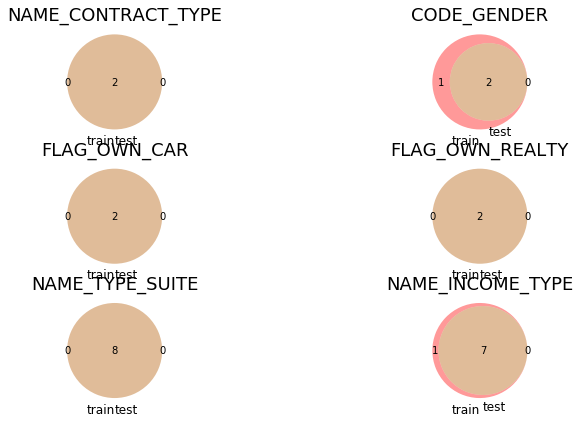

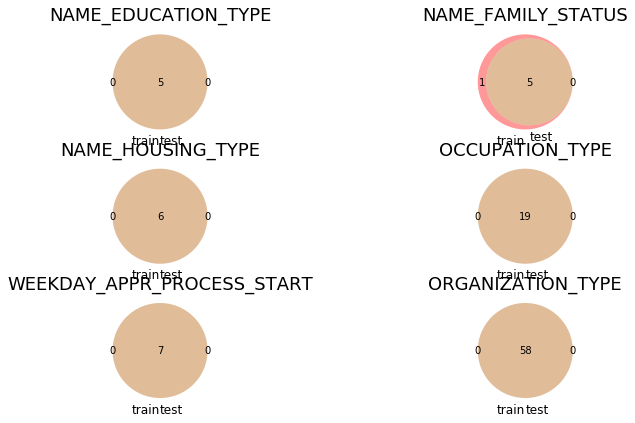

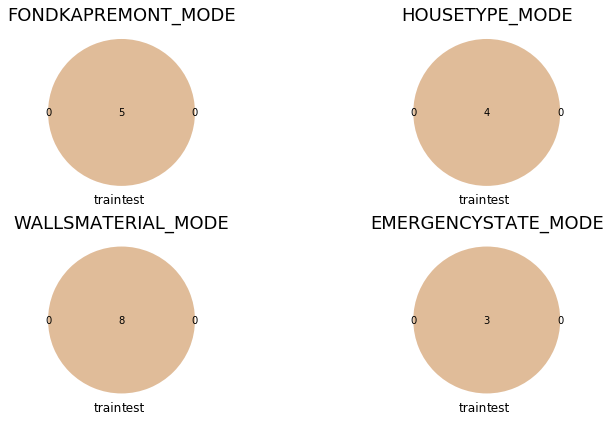

In [7]:
col = list(EDA.split_seq(obj_features, 6))
for c in col:
    EDA.venn_diagram(train, test, c, (12, 7))

In [29]:
obj_features

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

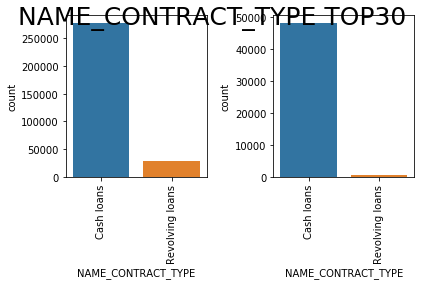

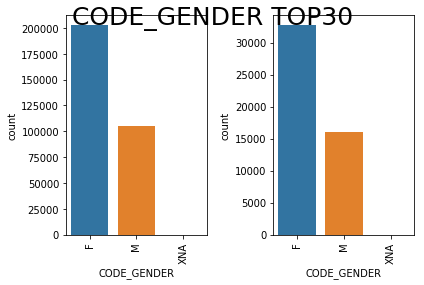

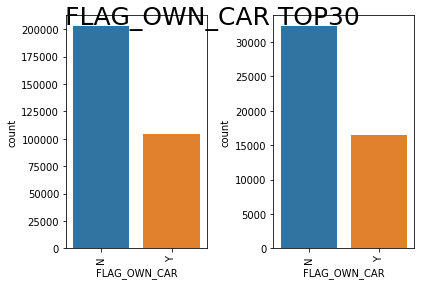

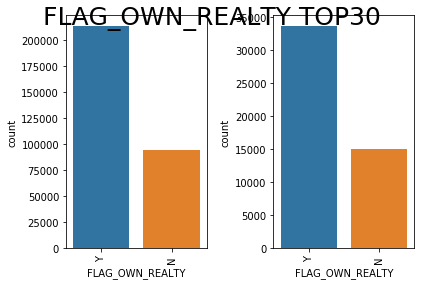

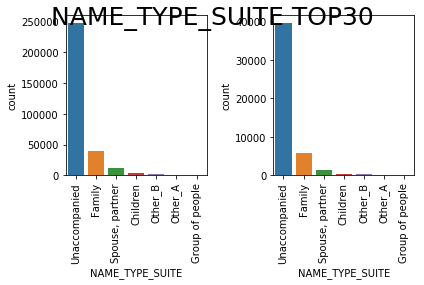

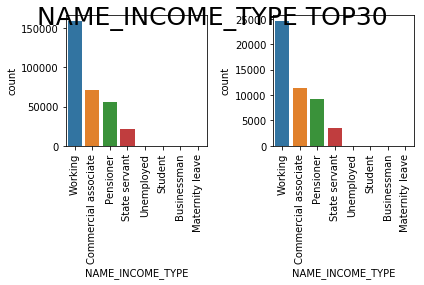

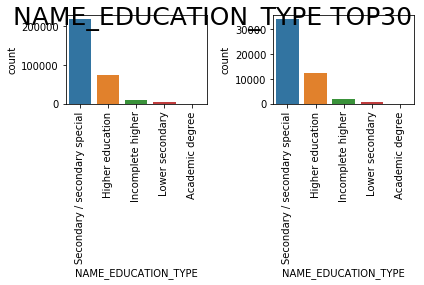

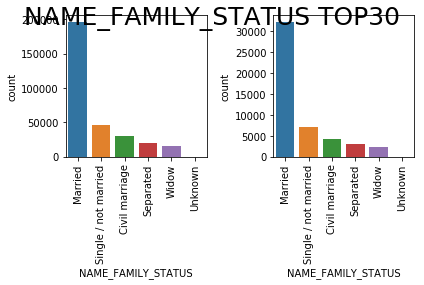

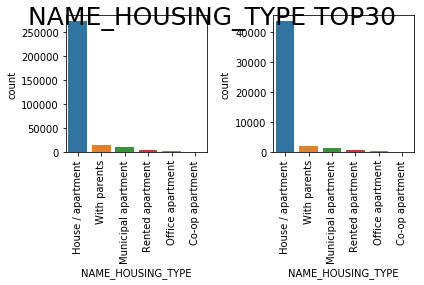

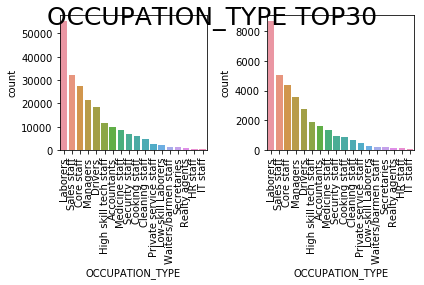

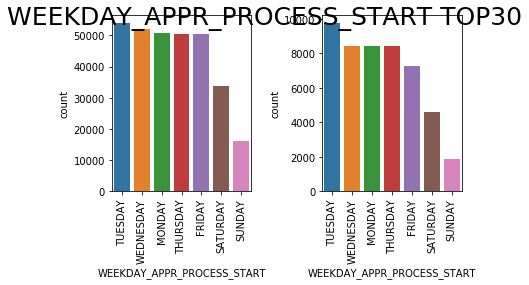

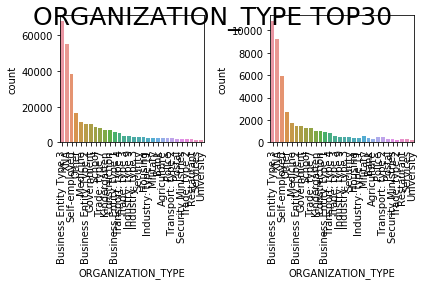

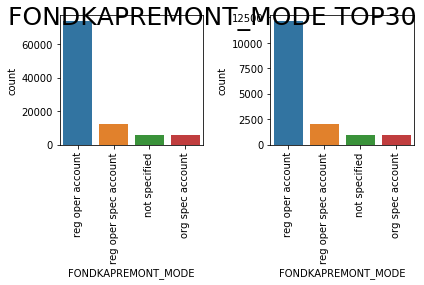

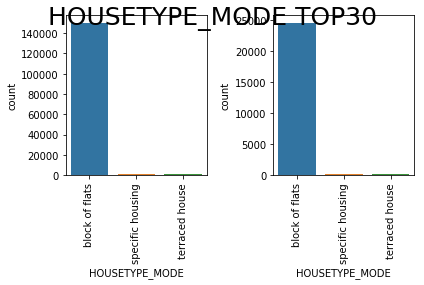

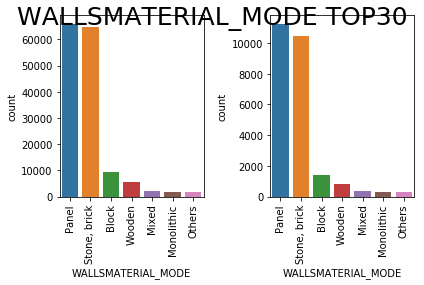

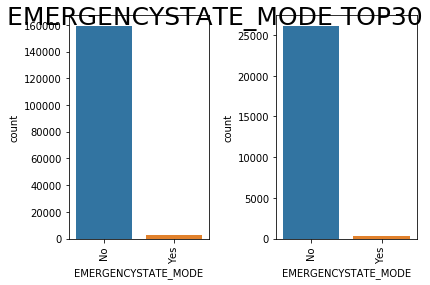

In [23]:
EDA.count_categories(train, obj_features, df2=test)

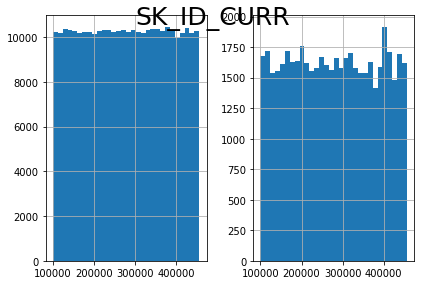

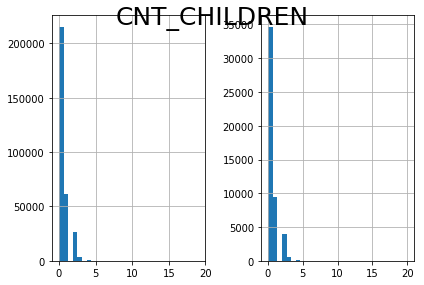

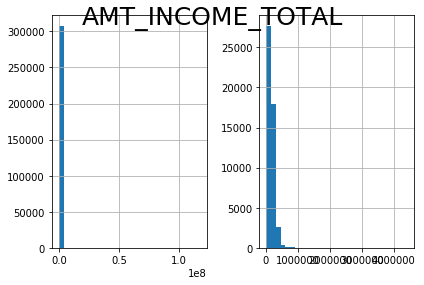

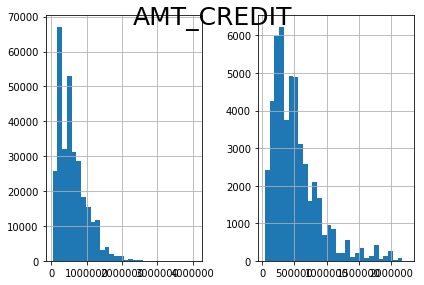

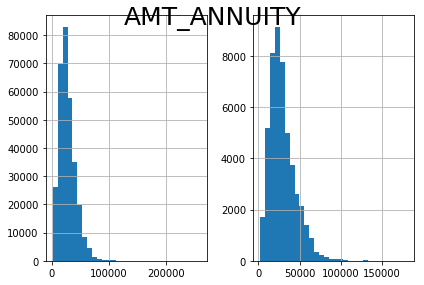

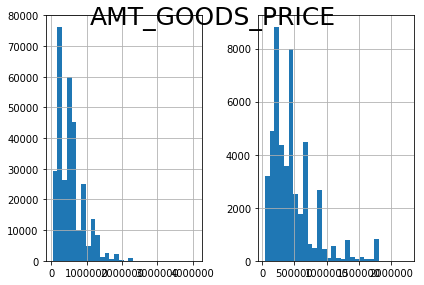

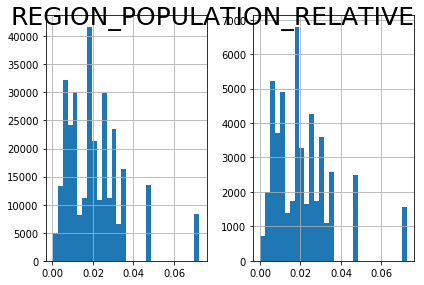

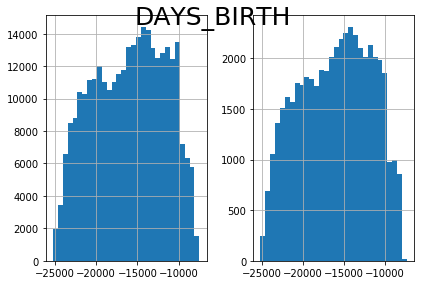

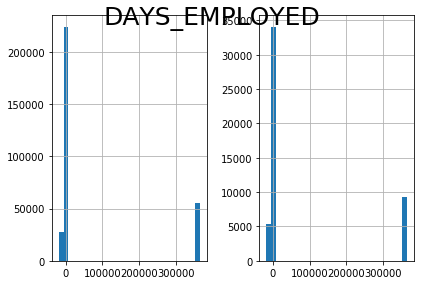

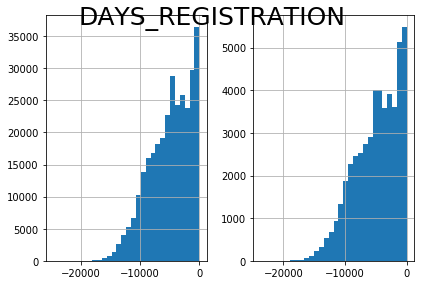

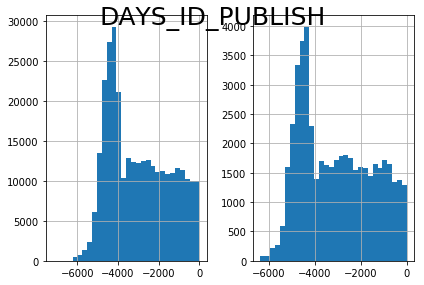

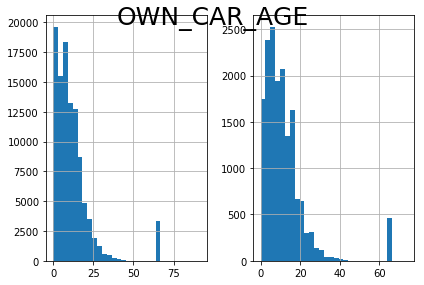

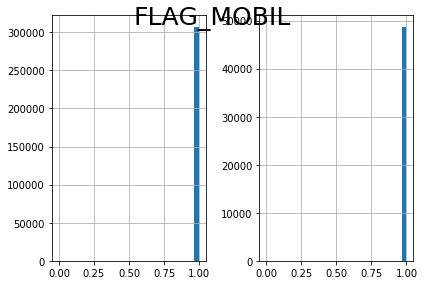

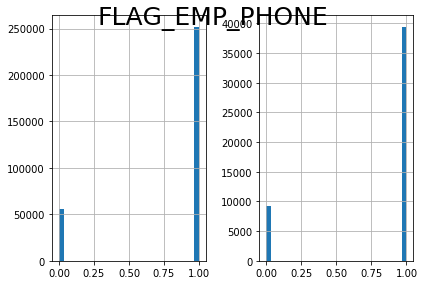

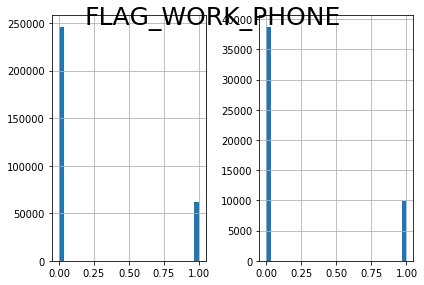

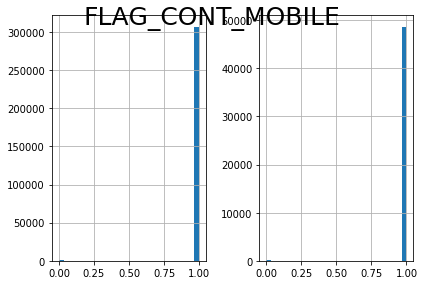

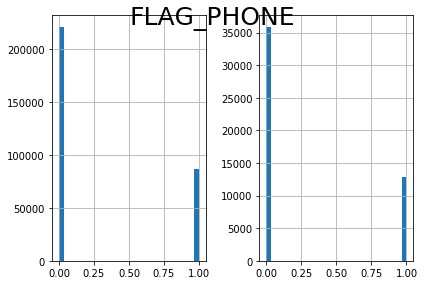

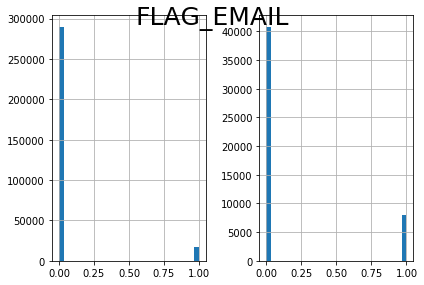

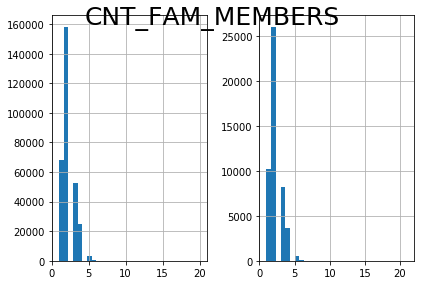

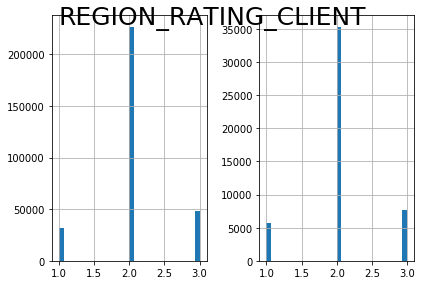

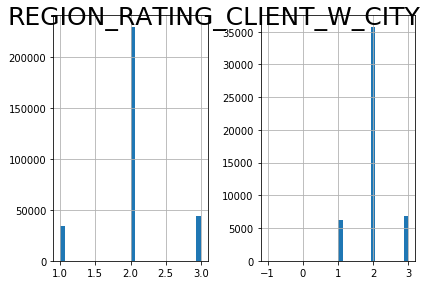

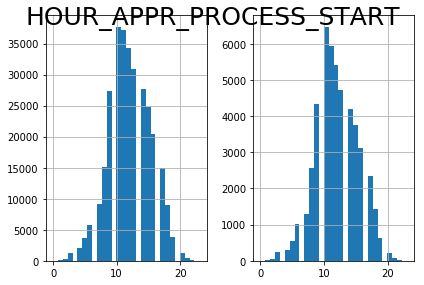

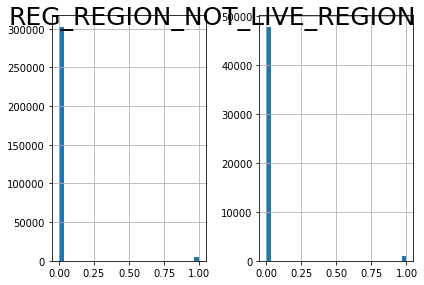

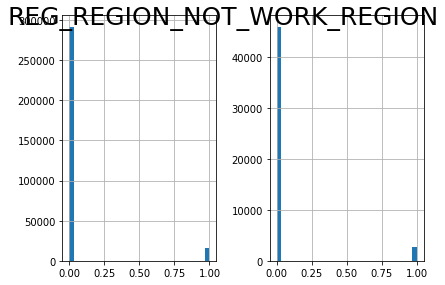

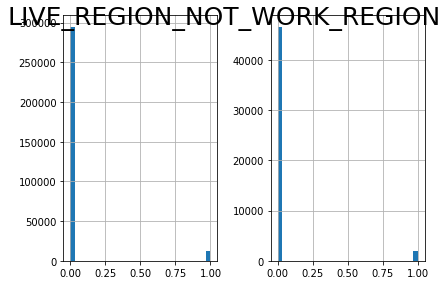

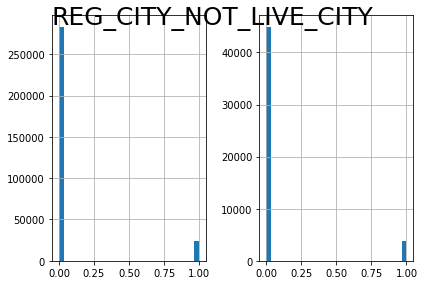

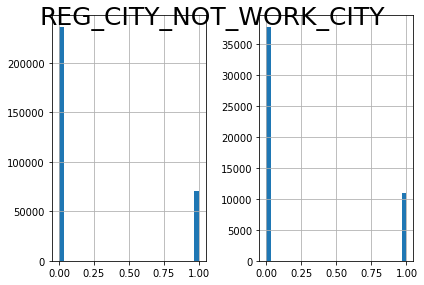

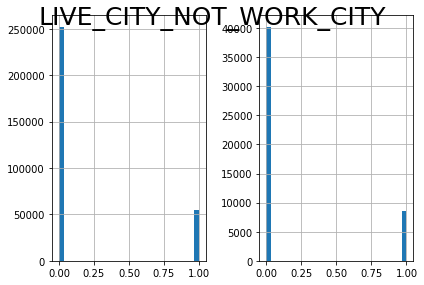

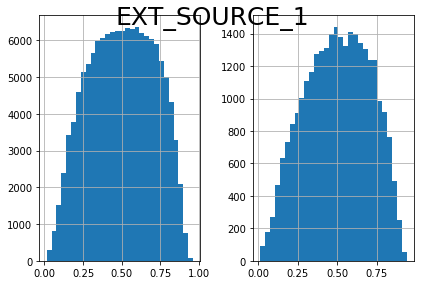

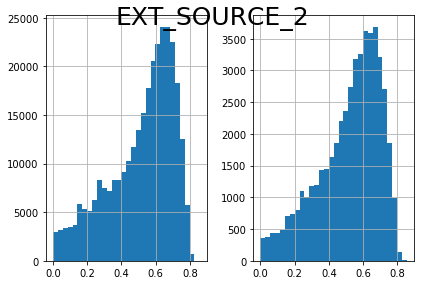

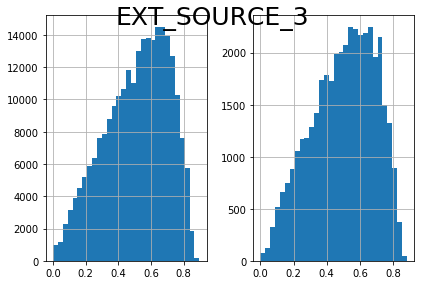

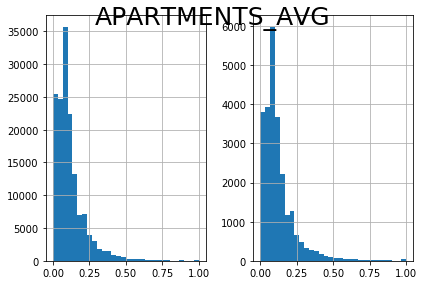

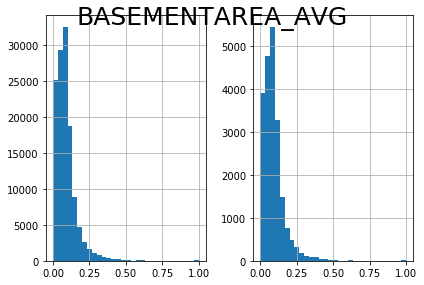

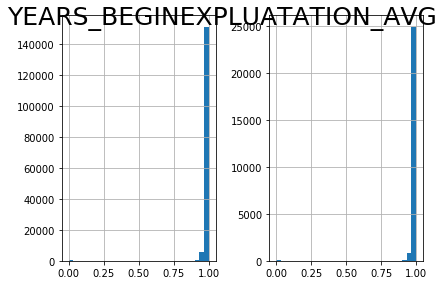

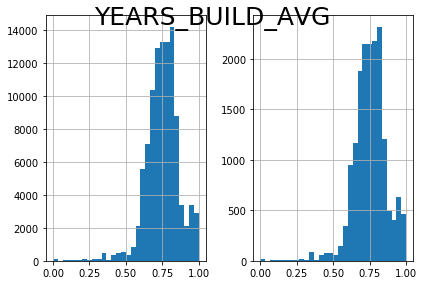

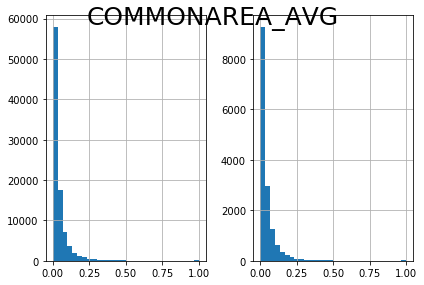

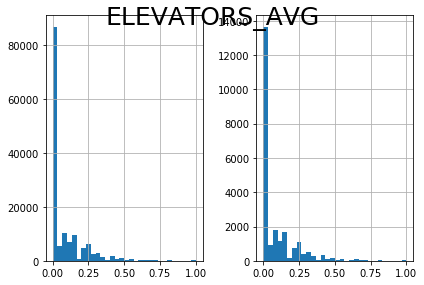

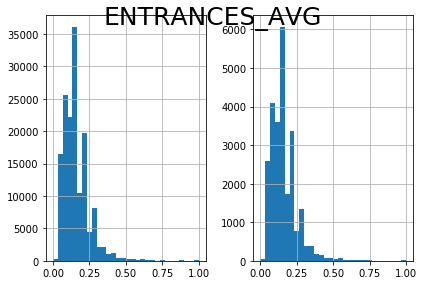

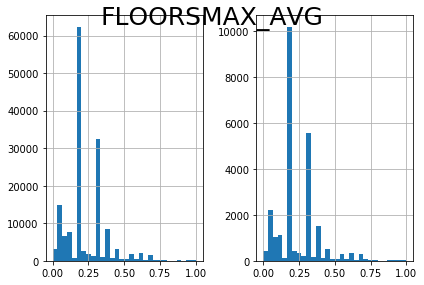

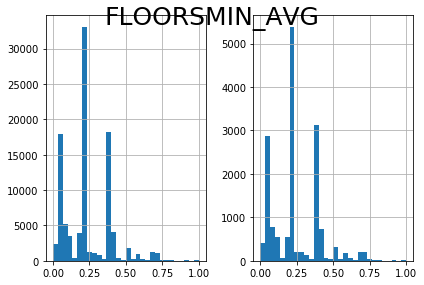

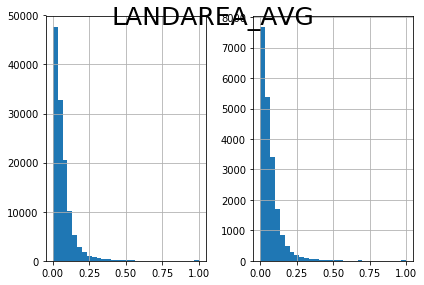

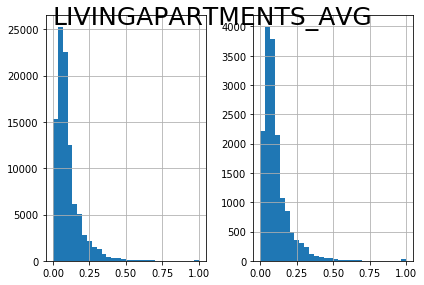

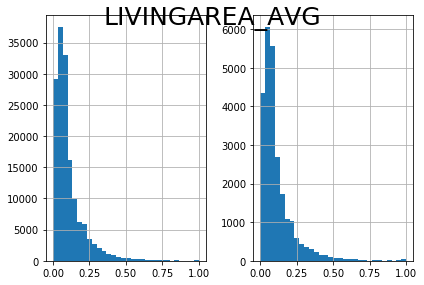

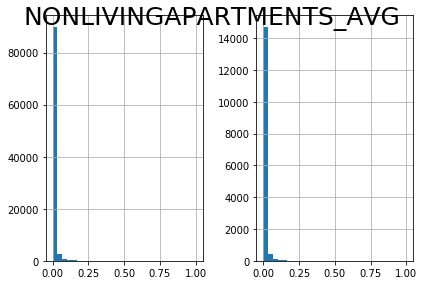

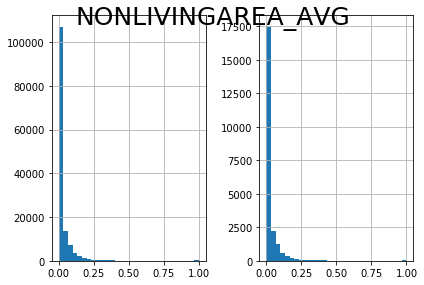

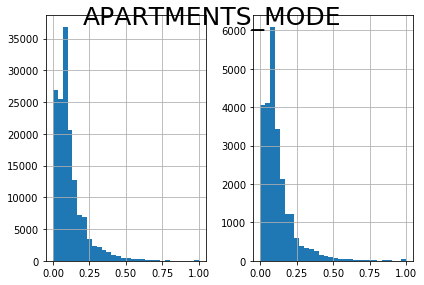

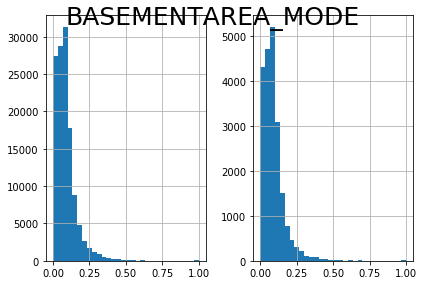

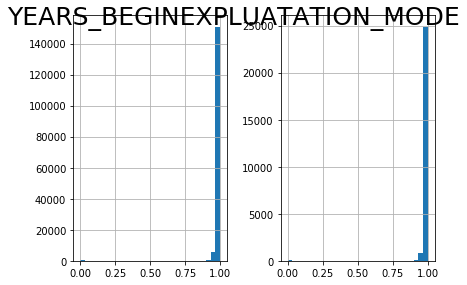

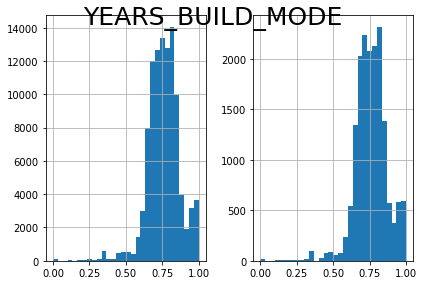

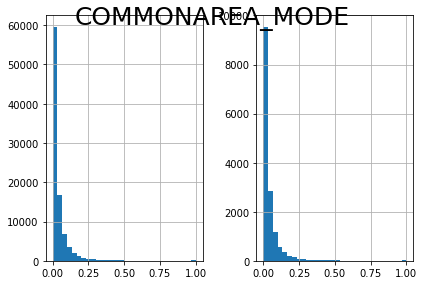

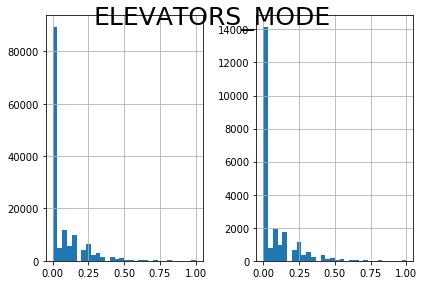

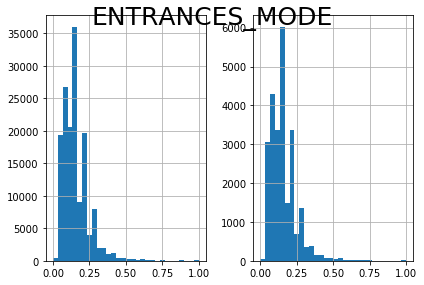

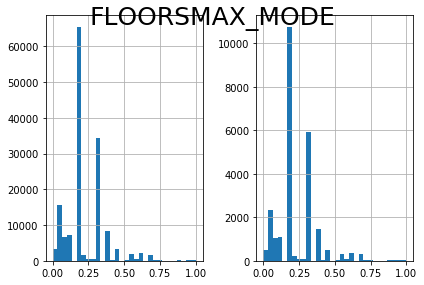

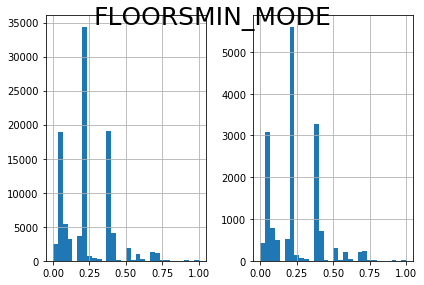

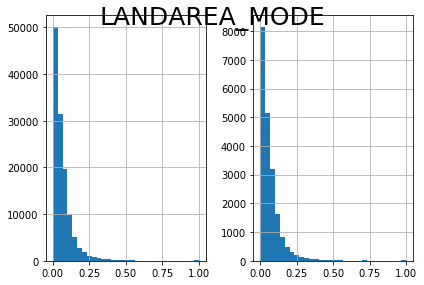

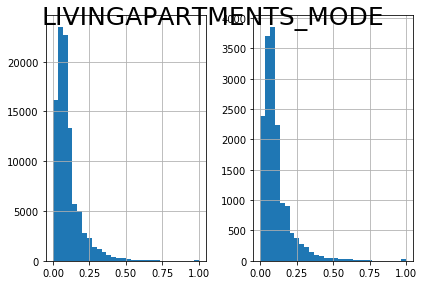

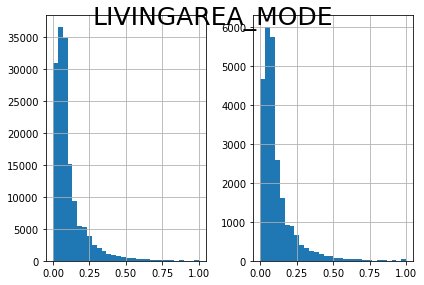

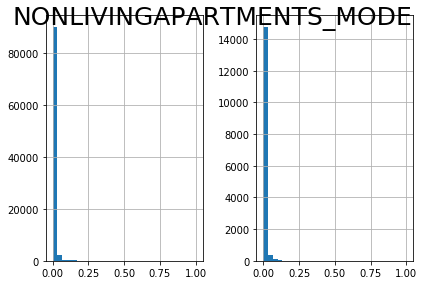

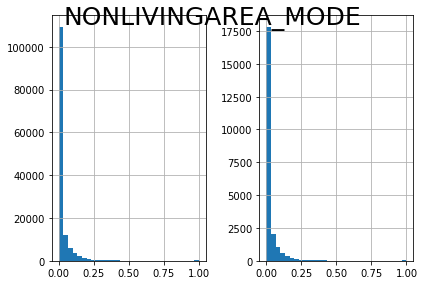

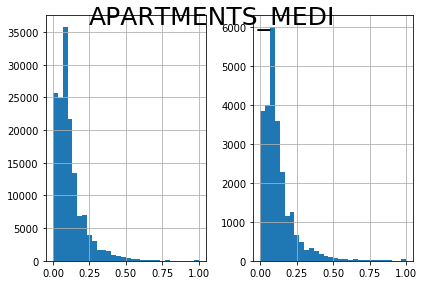

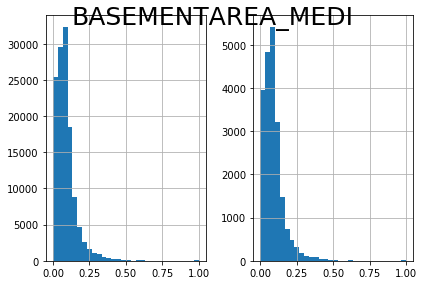

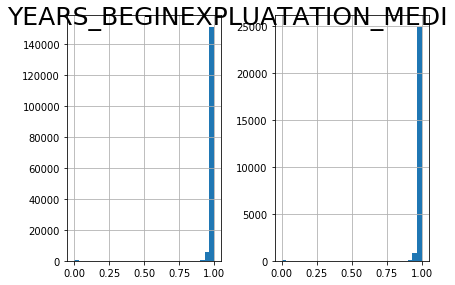

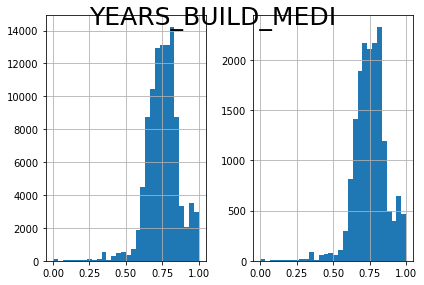

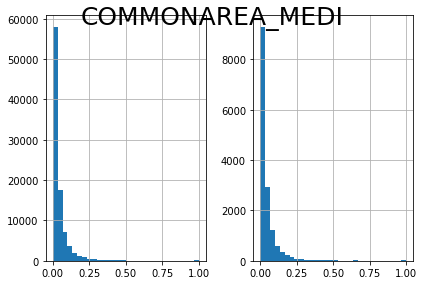

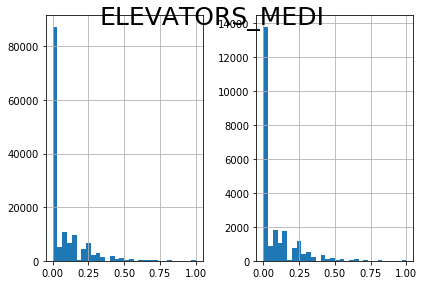

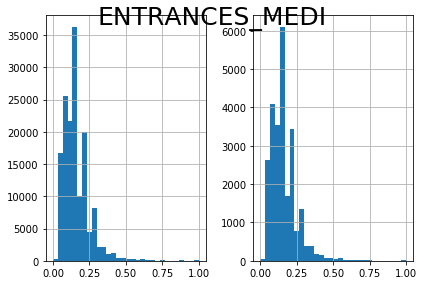

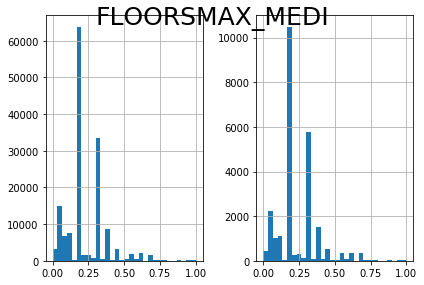

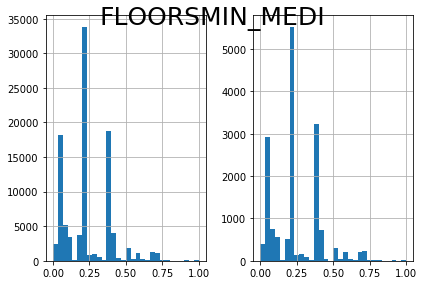

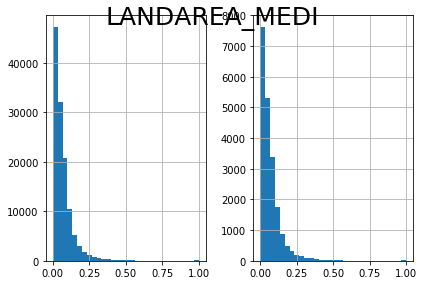

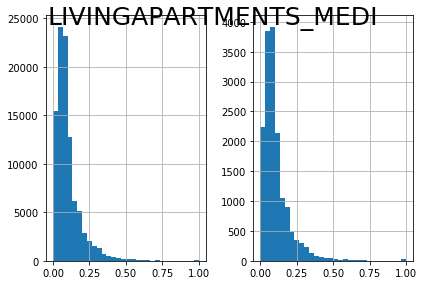

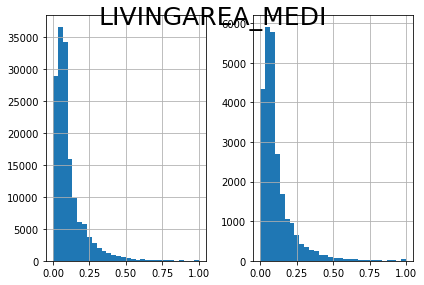

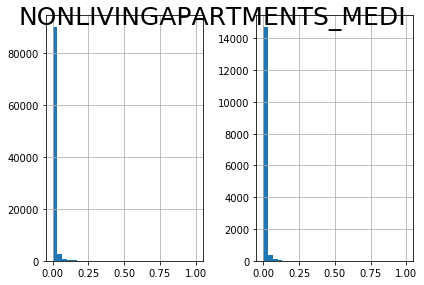

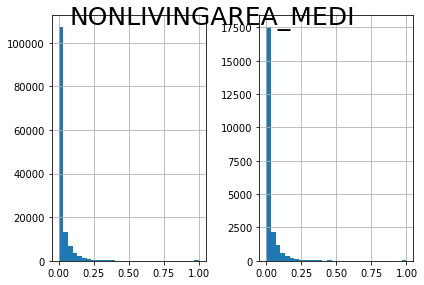

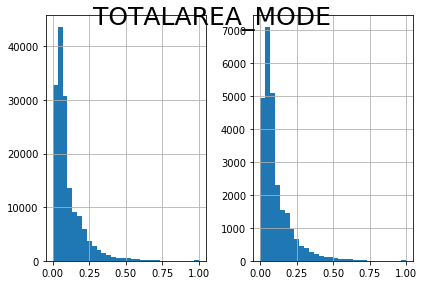

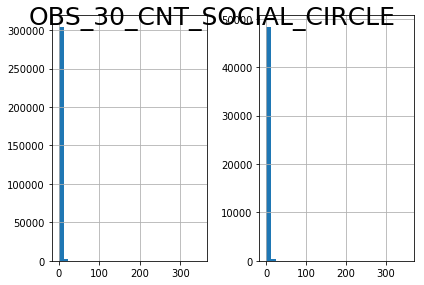

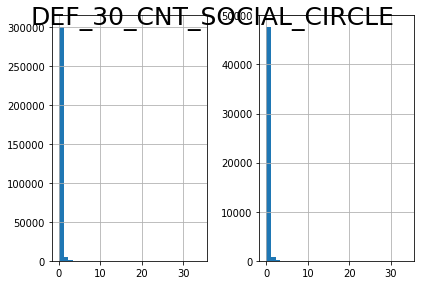

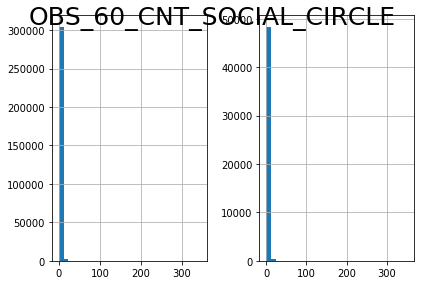

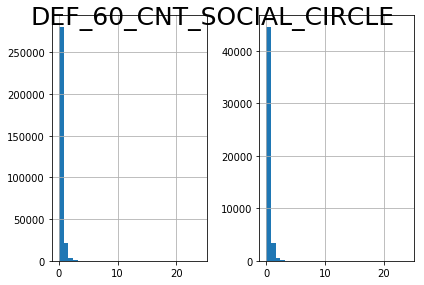

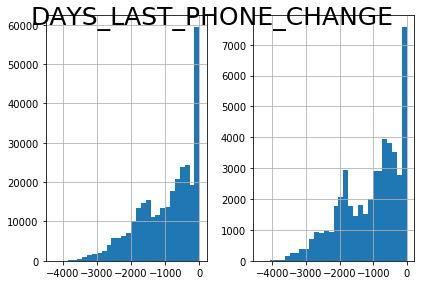

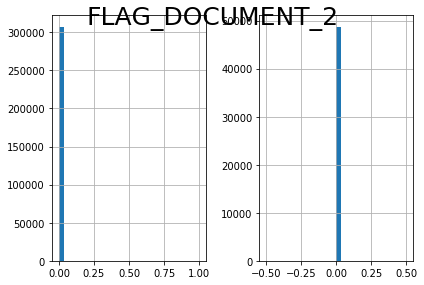

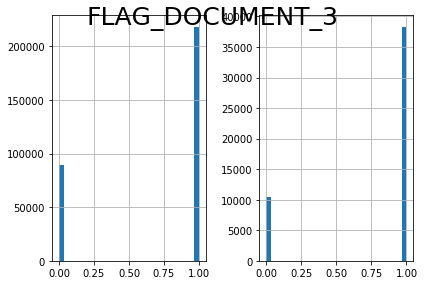

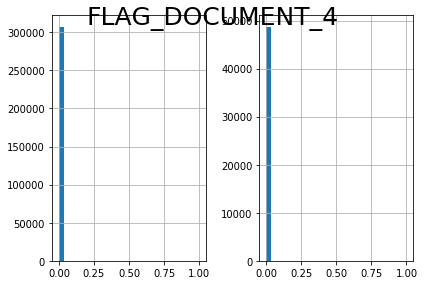

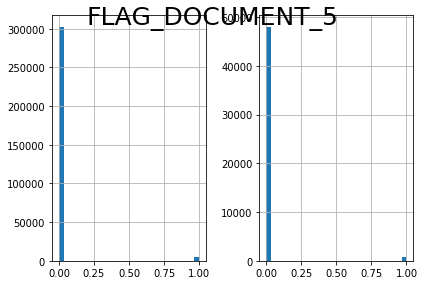

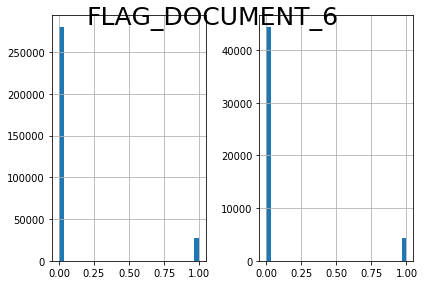

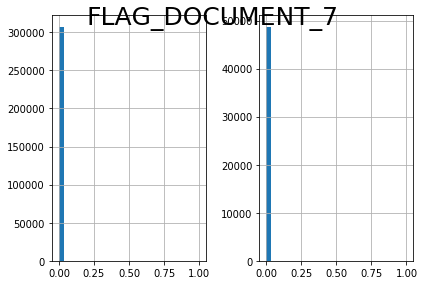

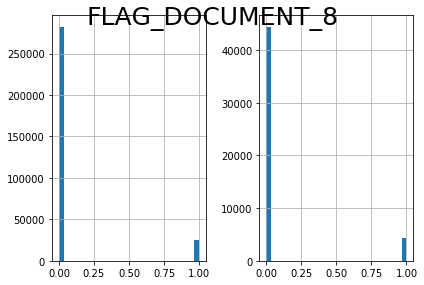

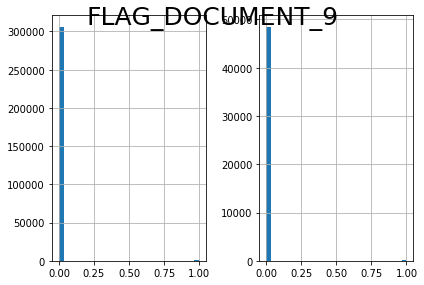

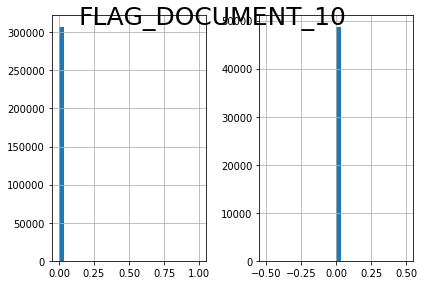

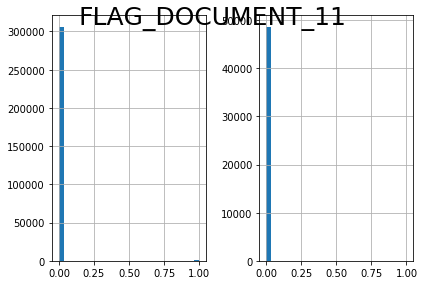

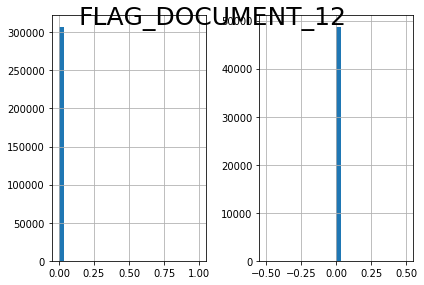

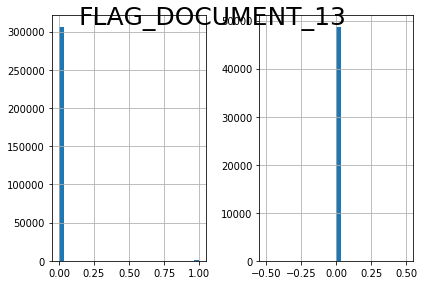

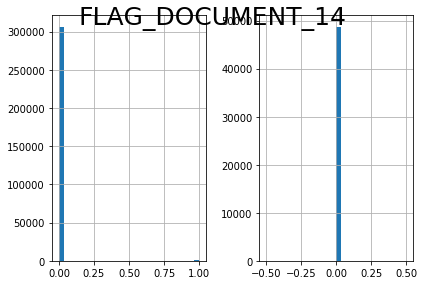

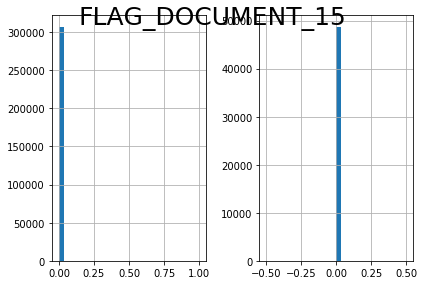

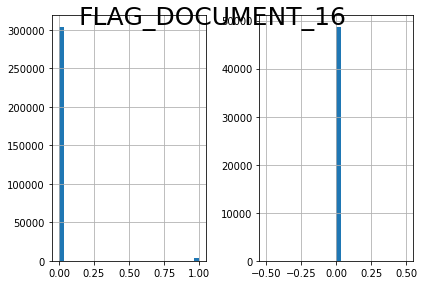

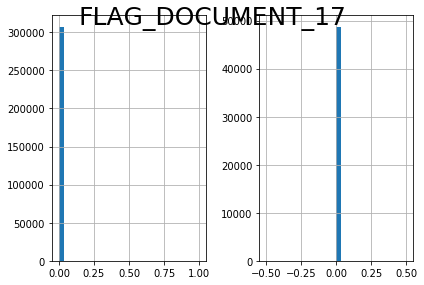

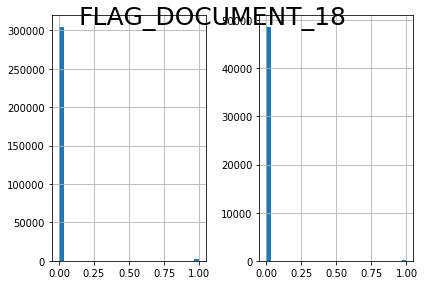

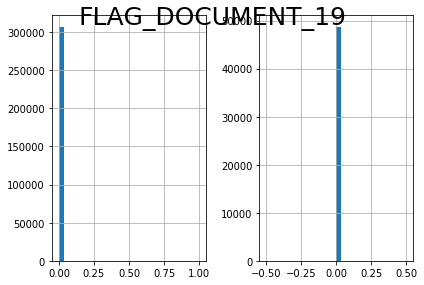

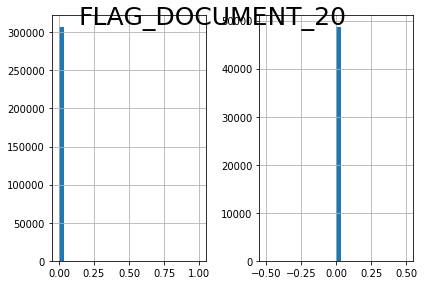

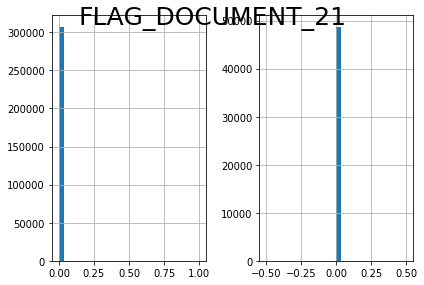

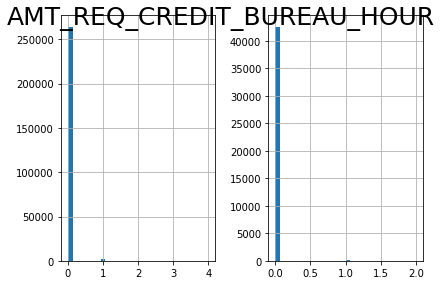

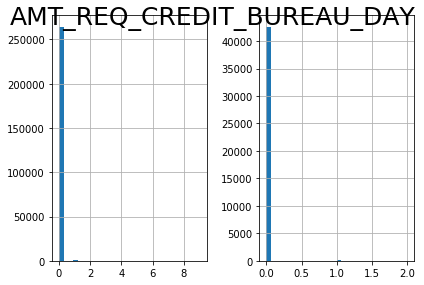

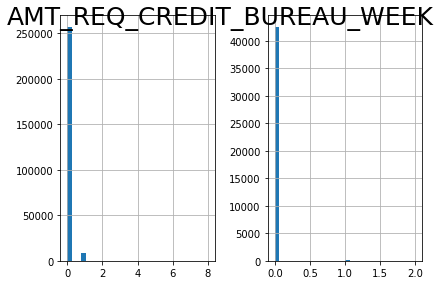

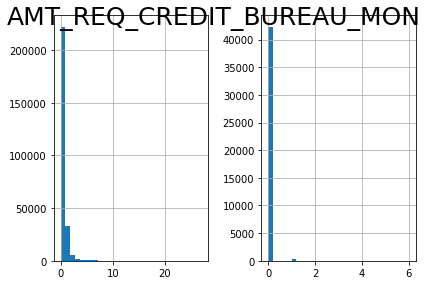

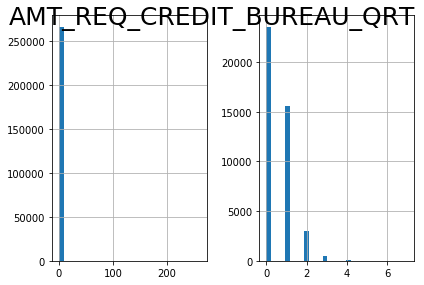

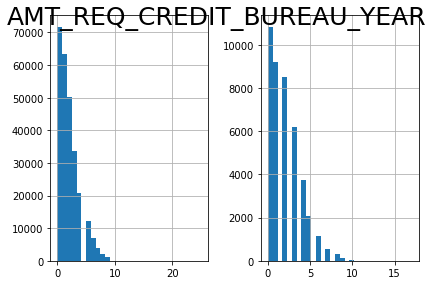

In [28]:
EDA.hist_continuous(train, [c for c in test.columns if test[c].dtype!='O'], df2=test)

In [10]:
import imp

In [25]:
imp.reload(EDA)

<module 'EDA' from '/home/kazuki_onodera/Home-Credit-Default-Risk/py/EDA.py'>

In [8]:
train['data'] = 'train'
test['data'] = 'test'
trte = pd.concat([train, test], ignore_index=True)

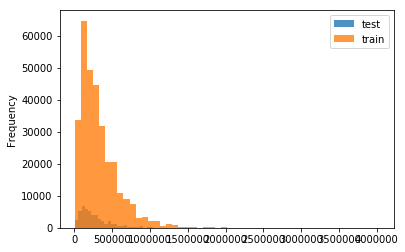

In [17]:
trte.groupby('data')['AMT_CREDIT-d-CNT_FAM_MEMBERS'].plot(kind='hist', legend=True, bins=50, alpha=0.8)
plt.show()

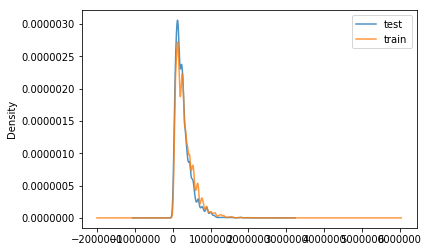

In [18]:
trte.groupby('data')['AMT_CREDIT-d-CNT_FAM_MEMBERS'].plot(kind='kde', legend=True, alpha=0.8)
plt.show()

In [15]:
trte.groupby('data')['AMT_CREDIT-d-CNT_FAM_MEMBERS'].describe()

,count,mean,std,min,25%,50%,75%,max
data,,,,,,,,
test,48744.0,275278.310513,218553.019658,10425.6,124857.5625,225000.0,355536.0,2160000.0
train,307509.0,323949.587662,259087.050339,6750.0,135533.2500,255051.0,437370.0,4031032.5


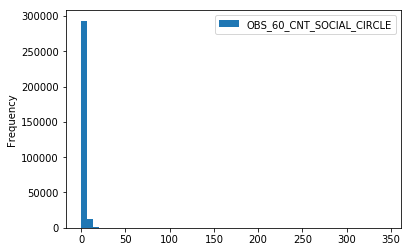

In [13]:
train['OBS_60_CNT_SOCIAL_CIRCLE'].plot(kind='hist', legend=True, bins=50)
plt.show()

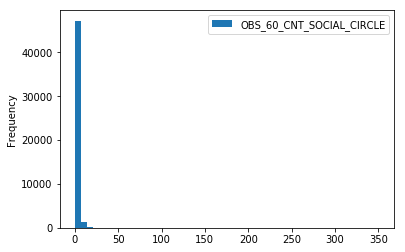

In [14]:
test['OBS_60_CNT_SOCIAL_CIRCLE'].plot(kind='hist', legend=True, bins=50)
plt.show()